In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_count = pd.read_csv("results/mobilenet/count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.872109,0.512934,0.810389,75.521816,55,1155840000
1,1,2,0.453888,0.401366,0.854000,71.194594,41,1155840000
2,1,3,0.390113,0.373390,0.862611,75.146706,45,1155840000
3,1,4,0.355201,0.359322,0.868111,74.326355,37,1155840000
4,1,5,0.332832,0.343148,0.875833,73.366607,45,1155840000
...,...,...,...,...,...,...,...,...
150,5,27,0.149440,0.353921,0.886667,69.492060,55,1155840000
151,5,28,0.141167,0.359715,0.885722,71.163831,45,1155840000
152,5,29,0.138578,0.369068,0.885833,70.027620,51,1155840000
153,5,30,0.134394,0.360469,0.887778,71.962833,45,1155840000


In [3]:
df_original = pd.read_csv("results/mobilenet/original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.867778,0.485624,0.823167,59.413528,0,0
1,1,2,0.442893,0.430652,0.843222,58.440686,0,0
2,1,3,0.381076,0.368019,0.868611,58.661891,0,0
3,1,4,0.344995,0.352069,0.871667,58.187815,0,0
4,1,5,0.323958,0.352690,0.872944,57.408447,0,0
...,...,...,...,...,...,...,...,...
150,5,27,0.151249,0.367697,0.885944,57.380189,0,0
151,5,28,0.145998,0.347743,0.890500,57.770874,0,0
152,5,29,0.145465,0.352235,0.889000,57.696323,0,0
153,5,30,0.140254,0.359617,0.884944,56.941990,0,0


In [4]:
df_diff = pd.read_csv("results/mobilenet/diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.847416,0.466876,0.833778,56.699886,0,0
1,1,2,0.441914,0.385732,0.860889,55.908956,0,0
2,1,3,0.378976,0.372250,0.865667,56.494502,0,0
3,1,4,0.341760,0.349530,0.872111,56.910917,0,0
4,1,5,0.319286,0.359699,0.868889,57.313591,0,0
...,...,...,...,...,...,...,...,...
150,5,27,0.135458,0.401152,0.885278,55.500796,0,0
151,5,28,0.130780,0.387522,0.885333,55.271886,0,0
152,5,29,0.133340,0.377723,0.884167,53.935665,0,0
153,5,30,0.123612,0.393526,0.882333,55.312011,0,0


In [5]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [6]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_3697/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_3697/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_3697/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Frequência da ReLU

Tamanho da rede: 1_528_106

In [7]:
temp = df_count_train.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()}    1/{round(1/relu_proportion.mean()):_}")

Proporção Média da ReLU: 4.6436646363971944e-08    1/21_534_716


<Axes: xlabel='epoch', ylabel='relu_proportion'>

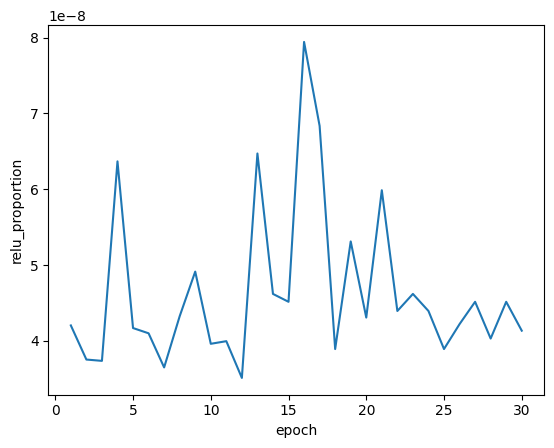

In [8]:
df_train_avg = df_count_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")

## Eficiência do Modelo

In [9]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 87.98%


<Axes: xlabel='epoch', ylabel='train_loss'>

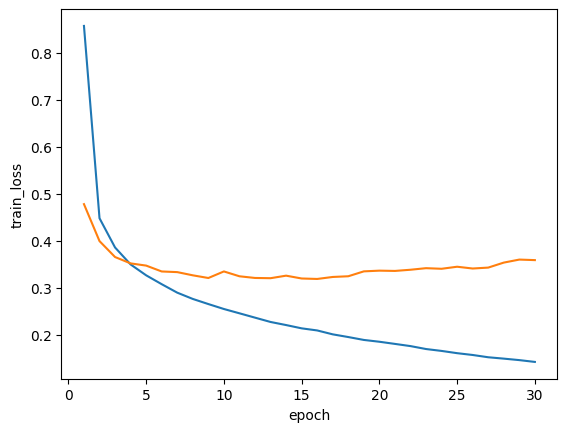

In [10]:
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")

In [11]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 35:55


## Comparando com funções diferenciáveis

In [12]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()

Text(0.5, 1.0, 'Tempo por Epoca')

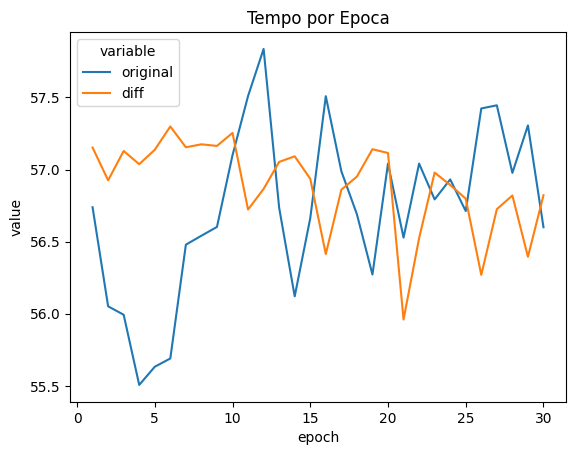

In [13]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Tempo por Epoca")

In [14]:
# tempo total de treino
time_original = round(df_train_avg_original["time"].sum())
time_diff = round(df_train_avg_diff["time"].sum())

print(f"Tempo total de treino (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo total de treino (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo total de treino (não diff): 28:21
Tempo total de treino (diff): 28:27
Diferença: 0.35%


Text(0.5, 1.0, 'Loss (Treino) por Epoca')

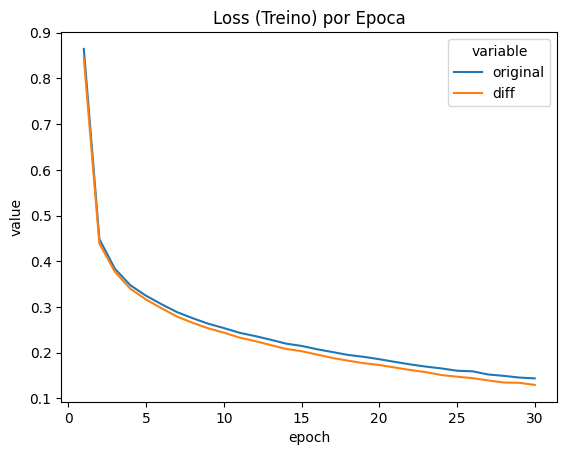

In [15]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

Text(0.5, 1.0, 'Loss (Validacao) por Epoca')

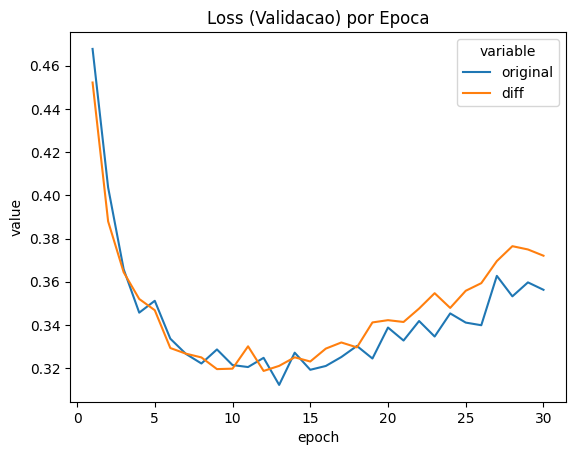

In [16]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Validacao) por Epoca")

Text(0.5, 1.0, 'Acurácia (Validacao) por Epoca')

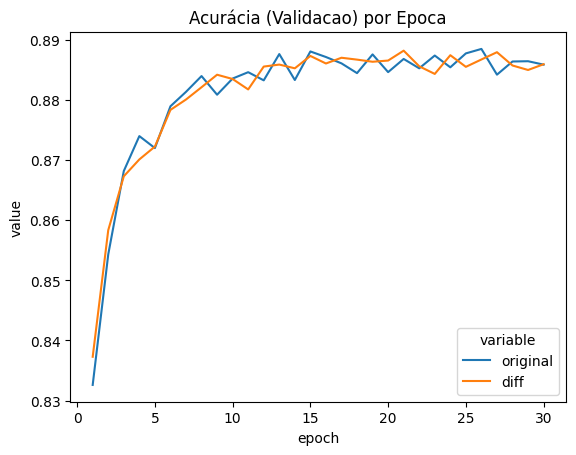

In [17]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Acurácia (Validacao) por Epoca")

In [18]:
# melhor época original
best_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()]
best_original

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
13,3.0,0.228486,0.312223,0.8876,56.734712,0.0,0.0,NaN


In [19]:
# melhor época diff
best_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()]
best_diff

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
12,3.0,0.225415,0.318697,0.885522,56.865655,0.0,0.0,NaN


In [20]:
column_original = np.array([best_original.index[0]] + list(best_original.values[0]))[:6]
column_diff = np.array([best_diff.index[0]] + list(best_diff.values[0]))[:6]
column_difference = 100 * (column_diff - column_original) / column_original
indexes = ["epoch"] + list(best_original)[:5]
pd.DataFrame({"Não Diferenciáveis": column_original, "Diferenciáveis": column_diff, "Diferença (%)": column_difference}, index=indexes)

,Não Diferenciáveis,Diferenciáveis,Diferença (%)
epoch,13.000000,12.000000,-7.692308
execution,3.000000,3.000000,0.000000
train_loss,0.228486,0.225415,-1.344006
val_loss,0.312223,0.318697,2.073568
val_acc,0.887600,0.885522,-0.234089
time,56.734712,56.865655,0.230798


In [21]:
# tempo para chegar na melhor época
epoch_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()].index[0]
epoch_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()].index[0]

time_original = round(df_train_avg_original.head(epoch_original)["time"].sum())
time_diff = round(df_train_avg_diff.head(epoch_diff)["time"].sum())

#print(f"Tempo de treino até melhor época (não diff): {time_original//60:02}:{time_original%60:02}")
#print(f"Tempo de treino até melhor época (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Tempo de treino até melhor época (não diff): {time_original}")
print(f"Tempo de treino até melhor época (diff): {time_diff}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo de treino até melhor época (não diff): 734
Tempo de treino até melhor época (diff): 685
Diferença: -6.68%


## Avaliação nos dados de teste

In [22]:
df_diff_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
30,1,-1,NaN,0.329673,0.8807,2.102128,0,0
61,2,-1,NaN,0.329113,0.8842,2.074679,0,0
92,3,-1,NaN,0.324157,0.8831,2.090022,0,0
123,4,-1,NaN,0.332741,0.8815,2.089263,0,0
154,5,-1,NaN,0.334602,0.8776,2.124721,0,0


In [23]:
df_original_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
30,1,-1,NaN,0.324862,0.8811,2.135804,0,0
61,2,-1,NaN,0.324846,0.8810,2.120873,0,0
92,3,-1,NaN,0.325891,0.8820,2.097877,0,0
123,4,-1,NaN,0.325107,0.8865,2.124921,0,0
154,5,-1,NaN,0.328481,0.8864,2.073194,0,0


In [24]:
# prediction time
diff_time = df_diff_test["time"].mean()
original_time = df_original_test["time"].mean()
diff = (diff_time - original_time) / original_time
print(f"Tempo Diferenciáveis: {diff_time} seg")
print(f"Tempo Não-diferenciáveis: {original_time} seg")
print(f"Diferenciáveis são {round(100*diff, 2)}% mais lentas")

Tempo Diferenciáveis: 2.096162700653076 seg
Tempo Não-diferenciáveis: 2.110533666610718 seg
Diferenciáveis são -0.68% mais lentas


In [25]:
# loss
diff_loss = df_diff_test["val_loss"].mean()
original_loss = df_original_test["val_loss"].mean()
diff = (diff_loss - original_loss) / original_loss
print(f"Loss Diferenciáveis: {diff_loss}")
print(f"Loss Não-diferenciáveis: {original_loss}")
print(f"Diferenciáveis são {round(100*diff, 2)}% piores")

Loss Diferenciáveis: 0.3300572085380554
Loss Não-diferenciáveis: 0.3258371746540069
Diferenciáveis são 1.3% piores


In [26]:
# acc
diff_acc = df_diff_test["val_acc"].mean()
original_acc = df_original_test["val_acc"].mean()
diff = (diff_acc - original_acc) / original_acc
print(f"Acurácia Diferenciáveis: {diff_acc} seg")
print(f"Acurácia Não-diferenciáveis: {original_acc} seg")
if diff < 0:
    print(f"Acurácia das diferenciáveis é {-round(100*diff, 2)}% menor")
else:
    print(f"Acurácia das diferenciáveis é {round(100*diff, 2)}% maior")

Acurácia Diferenciáveis: 0.88142 seg
Acurácia Não-diferenciáveis: 0.8834 seg
Acurácia das diferenciáveis é 0.22% menor
